<a href="https://colab.research.google.com/github/wizard339/education/blob/main/misis/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import pandas as pd
import numpy as np
# import dask
# import pickle
# import dask.dataframe as dd


import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
# !pip install dask

     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.2 MB 960.0 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.2 MB 2.1 MB/s eta 0:00:01
     --------------- ------------------------ 0.5/1.2 MB 3.5 MB/s eta 0:00:01
     ------------------------- -------------- 0.7/1.2 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
print(os.listdir())

['.ipynb_checkpoints', 'products.csv', 'Product_dict.pkl', 'Untitled.ipynb', 'чековые данные.csv']


In [ ]:
# with open('Product_dict.pkl', 'rb') as f:
#     product_dict = pickle.load(f)

In [2]:
products_df = pd.read_csv('products.csv')
products_df.head()

,product_id,product
0,168308,(197312) Пакет-майка 25см х 45см 906
1,134832,(62448) Перекись водорода р-р наружн. 3% фл.по...
2,101384,(72183) Салициловая кислота р-р спирт 2% фл 40...
3,168570,(197309) Пакет 28см х 50см 906
4,146960,"(111023) Пакет ""Аптека Озерки"" 28 х 35см 906"


In [3]:
products_df.shape

(30418, 2)

In [9]:
# receipt_df = pd.read_csv('чековые данные.csv', low_memory=False, skiprows=[20000001, 20000002, 20000003])
receipt_df = pd.read_csv('data.csv', low_memory=False, index_col=[0])

In [10]:
receipt_df.tail()

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
99995,2018-12-07,201801,321,135428,"(64220) Фокусин капс.с модиф.высв. 0,4мг №90",627,144,-1,"1,00"
99996,2018-12-07,2610369,907,143610,(24701) Тирозол табл. п.о. 10 мг. №50,459,108,-1,"1,00"
99997,2018-12-07,2454531,596,150460,(14295) Деринат (натрия дезоксирибонуклеат) р-...,583,130,-1,"1,00"
99998,2018-12-07,2025602,110,148081,(39201) Хофитол тб 0.2г N60,595,135,-1,"1,00"
99999,2018-12-07,336647,849,62393,(115435) Бронхо Веда леденцы на травяной основ...,700,162,2883,"1,00"


# тест1

In [71]:
user_map_to_arti = {i[1]: i[0] for i in enumerate(receipt_df['contact_id'].unique())}
user_map_to_real = {i[0]: i[1] for i in enumerate(receipt_df['contact_id'].unique())}

In [74]:
shop_map_to_arti = {i[1]: i[0] for i in enumerate(receipt_df['shop_id'].unique())}
shop_map_to_real = {i[0]: i[1] for i in enumerate(receipt_df['shop_id'].unique())}

In [76]:
item_map_to_arti = {i[1]: i[0] for i in enumerate(receipt_df['product_id'].unique())}
item_map_to_real = {i[0]: i[1] for i in enumerate(receipt_df['product_id'].unique())}

In [78]:
receipt_df['contact_id'] = [user_map_to_arti[user] for user in receipt_df['contact_id']]

In [80]:
receipt_df['shop_id'] = [shop_map_to_arti[shop] for shop in receipt_df['shop_id']]

In [82]:
receipt_df['product_id'] = [item_map_to_arti[item] for item in receipt_df['product_id']]

In [86]:
receipt_df.columns = ['sale_date', 'user', 'shop', 'item', 'name',
       'item_sub_cat', 'item_cat', 'brand',
       'quantity']

In [192]:
df_for_item_item = receipt_df.sort_values(by=['user', 'shop', 'sale_date'])[['sale_date', 'user', 'shop', 'item', 'quantity']].reset_index(drop=True)
df_for_item_item

,sale_date,user,shop,item,quantity
0,2018-12-07,0,0,0,"1,00"
1,2018-12-07,0,0,4736,"1,00"
2,2018-12-07,0,0,211,"1,00"
3,2018-12-07,1,1,1,"1,00"
4,2018-12-07,2,2,2,"1,00"
...,...,...,...,...,...
99995,2018-12-07,40657,311,533,"1,00"
99996,2018-12-07,40658,554,519,"1,00"
99997,2018-12-07,40659,457,2051,"1,00"
99998,2018-12-07,40660,20,1024,"1,00"


In [219]:
df_for_item_item['quantity'] = df_for_item_item['quantity'].apply(lambda x: x.replace(",", ".")).apply(float)

In [145]:
df_for_item_item['item'].max()

8761

In [167]:
item_item = np.zeros((df_for_item_item['item'].nunique(), df_for_item_item['item'].nunique()))
item_item.shape

(8762, 8762)

In [177]:
item_item

array([[7.875e+03, 2.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.400e+01, 1.961e+03, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 9.000e+00, 1.044e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [170]:
np.sum(item_item)

157921.0

In [138]:
sale_id = 0
sale_id_list = [0]

for i in range(1, df_for_item_item.shape[0]):

    if ((df_for_item_item['sale_date'].iloc[i-1] == df_for_item_item['sale_date'].iloc[i]) & \
                 (df_for_item_item['user'].iloc[i-1] == df_for_item_item['user'].iloc[i]) & \
                 (df_for_item_item['shop'].iloc[i-1] == df_for_item_item['shop'].iloc[i])):
        sale_id_list.append(sale_id)
    else:
        sale_id += 1
        sale_id_list.append(sale_id)

In [168]:
items = [df_for_item_item['item'].iloc[0]]

for i in range(1, df_for_item_item.shape[0]):

    if df_for_item_item['sale_id'].iloc[i-1]==df_for_item_item['sale_id'].iloc[i]:
        items.append(df_for_item_item['item'].iloc[i])

    else:

        for i in range(0, len(items) - 1):
    
            for j in range(i, len(items) - 1):
        
                idx1 = items[i]
                idx2 = items[j]
                item_item[idx1, idx2] += 1
        
        items = [df_for_item_item['item'].iloc[i]]

In [134]:
len(sale_id_list)

100000

In [139]:
df_for_item_item['sale_id'] = sale_id_list
df_for_item_item

,sale_date,user,shop,item,sale_id
0,2018-12-07,0,0,0,0
1,2018-12-07,0,0,4736,0
2,2018-12-07,0,0,211,0
3,2018-12-07,1,1,1,1
4,2018-12-07,2,2,2,2
...,...,...,...,...,...
99995,2018-12-07,40657,311,533,41101
99996,2018-12-07,40658,554,519,41102
99997,2018-12-07,40659,457,2051,41103
99998,2018-12-07,40660,20,1024,41104


In [215]:
user_item = np.zeros((df_for_item_item['user'].nunique(), df_for_item_item['item'].nunique()))
user_item.shape

(40662, 8762)

In [221]:
user_item.sum()

171155.16599999985

In [220]:
for i in range(df_for_item_item.shape[0]):
    idx1 = df_for_item_item['user'].iloc[i]
    idx2 = df_for_item_item['item'].iloc[i]
    user_item[idx1, idx2] += df_for_item_item['quantity'].iloc[i]

In [96]:
df_for_item_item.query('user == 9873')

,sale_date,user,shop,item
14561,2018-12-09,9873,32,12
14562,2018-12-09,9873,32,12
14563,2018-12-09,9873,32,566
14564,2018-12-09,9873,32,279


In [110]:
receipt_df.head()

,sale_date,user,shop,item,name,item_sub_cat,item_cat,brand,quantity
0,2018-12-07,0,0,0,(197312) Пакет-майка 25см х 45см,906,205,-1,"1,00"
1,2018-12-07,1,1,1,(62448) Перекись водорода р-р наружн. 3% фл.по...,404,93,-1,"1,00"
2,2018-12-07,2,2,2,(72183) Салициловая кислота р-р спирт 2% фл 40...,404,93,-1,"1,00"
3,2018-12-07,3,3,3,(197309) Пакет 28см х 50см,906,205,-1,"1,00"
4,2018-12-07,4,4,4,(197310) Пакет 30см х 60см,906,205,-1,"1,00"


In [23]:
print(receipt_df['contact_id'].value_counts())

2447312    48
1038470    34
1155419    32
960440     27
1183431    26
           ..
1988360     1
2693797     1
100962      1
2520632     1
336647      1
Name: contact_id, Length: 40662, dtype: int64


In [28]:
receipt_df

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455,168308,(197312) Пакет-майка 25см х 45см,906,205,-1,"1,00"
1,2018-12-07,198287,279,134832,(62448) Перекись водорода р-р наружн. 3% фл.по...,404,93,-1,"1,00"
2,2018-12-07,2418385,848,101384,(72183) Салициловая кислота р-р спирт 2% фл 40...,404,93,-1,"1,00"
3,2018-12-07,1285774,1511,168570,(197309) Пакет 28см х 50см,906,205,-1,"1,00"
4,2018-12-07,1810323,1501,168319,(197310) Пакет 30см х 60см,906,205,-1,"1,00"
...,...,...,...,...,...,...,...,...,...
99995,2018-12-07,201801,321,135428,"(64220) Фокусин капс.с модиф.высв. 0,4мг №90",627,144,-1,"1,00"
99996,2018-12-07,2610369,907,143610,(24701) Тирозол табл. п.о. 10 мг. №50,459,108,-1,"1,00"
99997,2018-12-07,2454531,596,150460,(14295) Деринат (натрия дезоксирибонуклеат) р-...,583,130,-1,"1,00"
99998,2018-12-07,2025602,110,148081,(39201) Хофитол тб 0.2г N60,595,135,-1,"1,00"


# остальное

In [ ]:
receipt_df.shape

(20000000, 9)

In [ ]:
receipt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 9 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   sale_date_date           object
 1   contact_id               int64 
 2   shop_id                  int64 
 3   product_id               int64 
 4   name                     object
 5   product_sub_category_id  int64 
 6   product_category_id      int64 
 7   brand_id                 int64 
 8   quantity                 object
dtypes: int64(6), object(3)
memory usage: 1.3+ GB


In [ ]:
receipt_df.columns

Index(['sale_date_date', 'contact_id', 'shop_id', 'product_id', 'name',
       'product_sub_category_id', 'product_category_id', 'brand_id',
       'quantity'],
      dtype='object')

In [ ]:
receipt_df[receipt_df['contact_id']=='730404']

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
4732950,2018-01-08,730404,862.0,80944.0,(67303) Панкреатин таб.п.о.кишечнораств. 30 ЕД...,601.0,135.0,-1.0,"1,00"
4735089,2018-01-05,730404,862.0,156136.0,(180238) PL Бахилы медицинские №10 (5 пар),414.0,97.0,1520.0,"1,00"
4757734,2018-01-08,730404,862.0,106860.0,(103180) PL Контейнер д/биопроб универс. 120мл...,711.0,165.0,1520.0,"1,00"
4757795,2018-01-08,730404,862.0,135702.0,(64773) Ацикловир Белупо крем наружн. 5% туба 10г,705.0,162.0,-1.0,"1,00"
4760317,2018-01-05,730404,862.0,43759.0,(33169) Гидроперит тб 1.5г N8,404.0,93.0,-1.0,"1,00"
...,...,...,...,...,...,...,...,...,...
19980298,2018-06-13,730404,862.0,113441.0,(106829) Натрия хлорид 0.9% р-р д/инфуз фл 200...,720.0,166.0,-1.0,"2,00"
19980302,2018-06-13,730404,862.0,78795.0,(10339) Система для переливания инфузионных ра...,761.0,176.0,879.0,"2,00"
19980607,2018-06-13,730404,862.0,158600.0,(181232) PL Шприц одноразовый 3-комп. 5мл №1,762.0,176.0,1520.0,"8,00"
19981747,2018-06-14,730404,862.0,115538.0,(42780) Анузол суппоз.рект.№10,445.0,103.0,-1.0,"2,00"


In [ ]:
receipt_df['contact_id'].value_counts()

730404     13905
665607      8677
795400      8264
995207      7455
749095      7377
           ...  
2474875        1
410505         1
1900877        1
1885766        1
1579612        1
Name: contact_id, Length: 1642379, dtype: int64

In [ ]:
print(f"Пропусков в столбце: {sum(receipt_df['shop_id'].isnull())}")

Пропусков в столбце: 0


In [ ]:
receipt_df['shop_id'].value_counts()

313.0     267255
323.0     259413
350.0     255904
316.0     251810
269.0     242599
           ...  
2081.0         1
719.0          1
1202.0         1
1688.0         1
1640.0         1
Name: shop_id, Length: 851, dtype: int64

In [ ]:
print(f"Пропусков в столбце: {sum(receipt_df['shop_id'].isnull())}")

Пропусков в столбце: 0


### Анализ столбца product_category_id

In [ ]:
receipt_df['product_category_id'].value_counts()

170.0    2969444
162.0    1906617
135.0    1890878
101.0    1363400
146.0    1009485
          ...   
184.0          8
203.0          6
149.0          5
207.0          4
145.0          4
Name: product_category_id, Length: 112, dtype: int64

In [ ]:
print(f"Пропусков в столбце: {sum(receipt_df['product_category_id'].isnull())}")

Пропусков в столбце: 0


In [ ]:
receipt_df['product_sub_category_id'].value_counts()

 738.0    2555316
 397.0     841103
 595.0     749197
-1.0       652908
 404.0     588604
           ...   
 832.0          1
 886.0          1
 809.0          1
 483.0          1
 660.0          1
Name: product_sub_category_id, Length: 440, dtype: int64

### Анализ столбца 'brand_id'

In [ ]:
receipt_df['brand_id'].value_counts()

-1.0       16176371
 1520.0      881070
 1348.0      151294
 2038.0      105401
 4538.0       97269
             ...   
 1433.0           1
 4877.0           1
 932.0            1
 1539.0           1
 4529.0           1
Name: brand_id, Length: 1631, dtype: int64

In [ ]:
print(f"Пропусков в столбце: {sum(receipt_df['brand_id'].isnull())}")

Пропусков в столбце: 0


**ВЫВОД: более чем у 75 % записей, судя по всему, отсутствует указание бренда (лейбл '-1'), поэтому данный столбец в рекоммендациях учитывать не будем.**

### Анализ столбца 'sale_date_date'

In [11]:
# приводим столбец с датами к формату pandas Timestamp
receipt_df['sale_date_date'] = pd.to_datetime(receipt_df['sale_date_date'])

In [12]:
receipt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   sale_date_date           100000 non-null  datetime64[ns]
 1   contact_id               100000 non-null  int64         
 2   shop_id                  100000 non-null  int64         
 3   product_id               100000 non-null  int64         
 4   name                     99999 non-null   object        
 5   product_sub_category_id  100000 non-null  int64         
 6   product_category_id      100000 non-null  int64         
 7   brand_id                 100000 non-null  int64         
 8   quantity                 100000 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 7.6+ MB


In [13]:
print(f'Min дата: {min(receipt_df["sale_date_date"])}')
print(f'Max дата: {max(receipt_df["sale_date_date"])}')

Min дата: 2018-12-07 00:00:00
Max дата: 2018-12-09 00:00:00


In [14]:
by_mounthes = []

# с января по август
for i in range(1, 9):
    cur_per = sum((receipt_df['sale_date_date']<f'2018-0{i+1}-01 00:00:00')&(receipt_df['sale_date_date']>=f'2018-0{i}-01 00:00:00'))
    by_mounthes.append(cur_per)
    print(f'{i} mounth:', cur_per)

# сентябрь
cur_per = sum((receipt_df['sale_date_date']<f'2018-10-01 00:00:00')&(receipt_df['sale_date_date']>=f'2018-09-01 00:00:00'))
by_mounthes.append(cur_per)
print(f'{9} mounth:', cur_per)

# с октября по н0ябрь
for i in range(10, 12):
    cur_per = sum((receipt_df['sale_date_date']<f'2018-{i+1}-01 00:00:00')&(receipt_df['sale_date_date']>=f'2018-{i}-01 00:00:00'))
    by_mounthes.append(cur_per)
    print(f'{i} mounth:', cur_per)

# декабрь
cur_per = sum(receipt_df['sale_date_date']>=f'2018-12-01 00:00:00')
by_mounthes.append(cur_per)
print(f'{12} mounth:', cur_per)

# проверим по сумме
print(f'Check: {sum(by_mounthes)}')

1 mounth: 0
2 mounth: 0
3 mounth: 0
4 mounth: 0
5 mounth: 0
6 mounth: 0
7 mounth: 0
8 mounth: 0
9 mounth: 0
10 mounth: 0
11 mounth: 0
12 mounth: 100000
Check: 100000


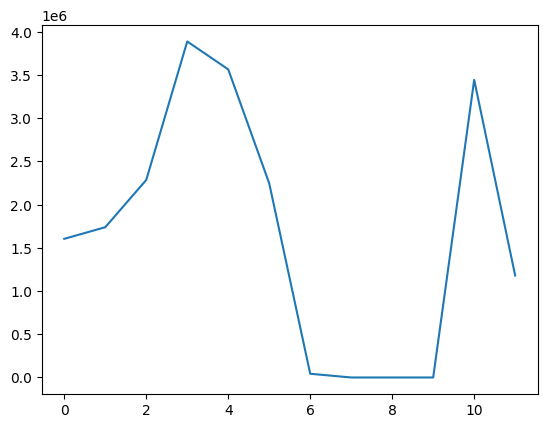

In [ ]:
# визуализация распределения чековых данных по месяцам
plt.plot(by_mounthes)

1. Распределение по году сильно неравномерное (в течение нескольких месяцев данные и вовсе отсутствуют), и этот факт может осложнить деление данных на выборки с учетом временного периода.

2. Продажи в аптеках могут быть скоррелированы с сезонными вспышками заболеваний (осень, зима - простудные заболевания, а поздней весной и летом, например, аллергия), что, вероятно, могло бы пригодиться при выдаче рекоммендаций, однако данную "сезонность" заболеваний можно учесть при item-based подходе, ориентируясь на товары в чеке. Ведь основная цель наших рекоммендаций: предложить дополнительные лекарства к приобретению в момент покупки, т.е. когда уже ясно, что покупатель приобретает.

**ВЫВОД: с учетом вышесказанного нет смысла делить данные на части с учетом временного периода.**

In [ ]:
receipt_df.iloc[:100000,:]

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455,168308,(197312) Пакет-майка 25см х 45см,906,205,-1,"1,00"
1,2018-12-07,198287,279,134832,(62448) Перекись водорода р-р наружн. 3% фл.по...,404,93,-1,"1,00"
2,2018-12-07,2418385,848,101384,(72183) Салициловая кислота р-р спирт 2% фл 40...,404,93,-1,"1,00"
3,2018-12-07,1285774,1511,168570,(197309) Пакет 28см х 50см,906,205,-1,"1,00"
4,2018-12-07,1810323,1501,168319,(197310) Пакет 30см х 60см,906,205,-1,"1,00"
...,...,...,...,...,...,...,...,...,...
99995,2018-12-07,201801,321,135428,"(64220) Фокусин капс.с модиф.высв. 0,4мг №90",627,144,-1,"1,00"
99996,2018-12-07,2610369,907,143610,(24701) Тирозол табл. п.о. 10 мг. №50,459,108,-1,"1,00"
99997,2018-12-07,2454531,596,150460,(14295) Деринат (натрия дезоксирибонуклеат) р-...,583,130,-1,"1,00"
99998,2018-12-07,2025602,110,148081,(39201) Хофитол тб 0.2г N60,595,135,-1,"1,00"


In [ ]:
receipt_df.iloc[:100000,:].to_csv('data.csv')